# Import Dataset dari Kaggle

## Mengimport library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Rescaling, Input
import cv2
import tensorflow_hub as hub
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers, models
from keras import optimizers
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG19, ResNet50V2

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varenzowie","key":"c3008a5e87b883ba27775cd6d5071f74"}'}

## Mendownload Dataset dari Kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d sumn2u/garbage-classification-v2

100% 750M/752M [00:44<00:00, 19.7MB/s]
100% 752M/752M [00:44<00:00, 17.9MB/s]


In [ ]:
!mkdir garbage-classification-v2
!unzip garbage-classification-v2.zip -d garbage-classification-v2

Streaming output truncated to the last 5000 lines.
  inflating: garbage-classification-v2/plastic/plastic_1508.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1509.jpg  
  inflating: garbage-classification-v2/plastic/plastic_151.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1510.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1511.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1512.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1513.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1514.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1515.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1516.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1517.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1518.jpg  
  inflating: garbage-classification-v2/plastic/plastic_1519.jpg  
  inflating: garbage-classification-v2/plastic/plastic_152.jpg  
  inflating: garbage-classi

## Membuat Path untuk Setiap Folder

In [ ]:
base_dir = "/content/garbage-classification-v2"  # Ganti dengan direktori dasar yang sesuai

# Membuat dictionary untuk menyimpan variabel-variabel
category_variables = {}

categories = [
    "battery", "biological", "cardboard", "clothes",
    "glass", "metal", "paper", "plastic",
    "shoes", "trash"
]

# Loop untuk membuat variabel-variabel
for category in categories:
    variable_name = f'datasetGambar{category.capitalize()}'
    category_dir = os.path.join(base_dir, category)
    category_variables[variable_name] = category_dir

# Mengakses file battery_1.jpg di dalam direktori battery
battery_image_path = os.path.join(category_variables['datasetGambarBattery'], 'battery_1.jpg')

print(f'Path untuk battery_1.jpg: {battery_image_path}')


Path untuk battery_1.jpg: /content/garbage-classification-v2/battery/battery_1.jpg


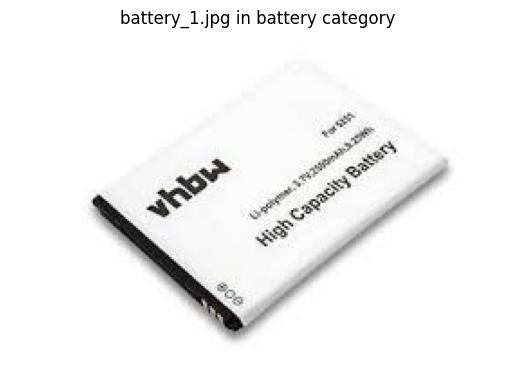

In [ ]:
# Menampilkan gambar
img = mpimg.imread(battery_image_path)
plt.imshow(img)
plt.axis('off')
plt.title('battery_1.jpg in battery category')
plt.show()

# Preprocessing data


In [ ]:
# Membuat dictionary untuk menyimpan panjang dataset untuk setiap kategori
panjang_dataset = {}

# Menghitung panjang dataset untuk setiap kategori
for category in categories:
    category_directory = os.path.join(base_dir, category)
    panjang_dataset[category] = len(os.listdir(category_directory))

# Menampilkan hasil
for category, length in panjang_dataset.items():
    print(f"Banyaknya gambar {category} pada Dataset: {length}")

Banyaknya gambar battery pada Dataset: 945
Banyaknya gambar biological pada Dataset: 985
Banyaknya gambar cardboard pada Dataset: 2341
Banyaknya gambar clothes pada Dataset: 5325
Banyaknya gambar glass pada Dataset: 4097
Banyaknya gambar metal pada Dataset: 1869
Banyaknya gambar paper pada Dataset: 2727
Banyaknya gambar plastic pada Dataset: 2542
Banyaknya gambar shoes pada Dataset: 1977
Banyaknya gambar trash pada Dataset: 834


## Removing Missing Value


In [ ]:
base_dir = '/content/garbage-classification-v2'

# Fungsi untuk memeriksa keberadaan nilai yang hilang dalam gambar
def check_and_remove_missing_values(image_directory):
    missing_values = 0
    for image_file in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_file)
        image = cv2.imread(image_path)
        if image is None:
            missing_values += 1
            # Hapus file yang memiliki nilai yang hilang
            os.remove(image_path)
            print(f"File {image_file} dihapus karena memiliki nilai yang hilang.")
    return missing_values

# Memeriksa keberadaan nilai yang hilang dan menghapus file untuk setiap kategori
for category in categories:
    category_directory = os.path.join(base_dir, category)
    missing_values = check_and_remove_missing_values(category_directory)
    print(f"Jumlah nilai yang hilang untuk kategori {category}: {missing_values}")


Jumlah nilai yang hilang untuk kategori battery: 0
Jumlah nilai yang hilang untuk kategori biological: 0
Jumlah nilai yang hilang untuk kategori cardboard: 0
Jumlah nilai yang hilang untuk kategori clothes: 0
Jumlah nilai yang hilang untuk kategori glass: 0
Jumlah nilai yang hilang untuk kategori metal: 0
Jumlah nilai yang hilang untuk kategori paper: 0
File plastic_154.jpg dihapus karena memiliki nilai yang hilang.
Jumlah nilai yang hilang untuk kategori plastic: 1
Jumlah nilai yang hilang untuk kategori shoes: 0
Jumlah nilai yang hilang untuk kategori trash: 0


In [ ]:
base_dir = '/content/garbage-classification-v2'

# Fungsi untuk memeriksa keberadaan nilai yang hilang dalam gambar
def check_missing_values(image_directory):
    missing_values = 0
    for image_file in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_file)
        image = cv2.imread(image_path)
        if image is None:
            missing_values += 1
    return missing_values

# Memeriksa keberadaan nilai yang hilang untuk setiap kategori
for category in categories:
    category_directory = os.path.join(base_dir, category)
    missing_values = check_missing_values(category_directory)
    print(f"Jumlah nilai yang hilang untuk kategori {category}: {missing_values}")


Jumlah nilai yang hilang untuk kategori battery: 0
Jumlah nilai yang hilang untuk kategori biological: 0
Jumlah nilai yang hilang untuk kategori cardboard: 0
Jumlah nilai yang hilang untuk kategori clothes: 0
Jumlah nilai yang hilang untuk kategori glass: 0
Jumlah nilai yang hilang untuk kategori metal: 0
Jumlah nilai yang hilang untuk kategori paper: 0
Jumlah nilai yang hilang untuk kategori plastic: 0
Jumlah nilai yang hilang untuk kategori shoes: 0
Jumlah nilai yang hilang untuk kategori trash: 0


## Preprocessing Image

In [ ]:
base_dir = "/content/garbage-classification-v2"

generator = ImageDataGenerator(rescale=1./255.,
                               validation_split=0.2,
                               horizontal_flip=True,
                               shear_range=0.2,
                               fill_mode='nearest',
                               vertical_flip=True,
                               zoom_range=0.2,
                               rotation_range=25)

train_data = generator.flow_from_directory(base_dir,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           subset="training",
                                           class_mode="categorical",
                                           seed=42)

val_data = generator.flow_from_directory(base_dir,
                                          batch_size=32,
                                          target_size=(224, 224),
                                          subset="validation",
                                          class_mode="categorical",
                                          seed=42)

Found 18916 images belonging to 10 classes.
Found 4725 images belonging to 10 classes.


#  Modeling and Testing



In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming you have 10 classes

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.0001),metrics=['acc'])

epochs = 20
history = model.fit(train_data, steps_per_epoch=100, epochs=epochs,
                              validation_data=val_data, validation_steps=50)


Epoch 1/20
100/100 [==============================] - 92s 862ms/step - loss: 2.1194 - acc: 0.2672 - val_loss: 1.9128 - val_acc: 0.3650
Epoch 2/20
100/100 [==============================] - 84s 845ms/step - loss: 1.8467 - acc: 0.3681 - val_loss: 1.7363 - val_acc: 0.4031
Epoch 3/20
100/100 [==============================] - 66s 658ms/step - loss: 1.7535 - acc: 0.3894 - val_loss: 1.6575 - val_acc: 0.4344
Epoch 4/20
100/100 [==============================] - 85s 851ms/step - loss: 1.6765 - acc: 0.4225 - val_loss: 1.6718 - val_acc: 0.4137
Epoch 5/20
100/100 [==============================] - 67s 671ms/step - loss: 1.6009 - acc: 0.4541 - val_loss: 1.5802 - val_acc: 0.4475
Epoch 6/20
100/100 [==============================] - 67s 672ms/step - loss: 1.5344 - acc: 0.4653 - val_loss: 1.4585 - val_acc: 0.4956
Epoch 7/20
100/100 [==============================] - 86s 867ms/step - loss: 1.4917 - acc: 0.4919 - val_loss: 1.4689 - val_acc: 0.4850
Epoch 8/20
100/100 [==============================] - 6

csfsfefsefsef

In [ ]:
pip install tensorflow tensorflow-hub

In [20]:
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.94:
            print("\nValidation accuracy reached 94% or more. Stopping training.")
            self.model.stop_training = True

def create_callbacks():
    stop_callback = StopTrainingCallback()
    callbacks = [stop_callback]
    return callbacks


In [22]:
callbacks = create_callbacks()

In [25]:
# Load the ResNet50 model with pre-trained weights
resnet50_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [26]:
tl_model = tf.keras.Sequential([
    resnet50_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjust the number of classes
])

for layer in resnet50_model.layers:
    layer.trainable = False


tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = tl_model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=callbacks
)


Epoch 1/10
592/592 [==============================] - 394s 578ms/step - loss: 0.4243 - accuracy: 0.8623 - val_loss: 0.3034 - val_accuracy: 0.8946
Epoch 2/10
592/592 [==============================] - 321s 542ms/step - loss: 0.2522 - accuracy: 0.9141 - val_loss: 0.2862 - val_accuracy: 0.9098
Epoch 3/10
592/592 [==============================] - 322s 543ms/step - loss: 0.2052 - accuracy: 0.9314 - val_loss: 0.2682 - val_accuracy: 0.9166
Epoch 4/10
592/592 [==============================] - 322s 545ms/step - loss: 0.1630 - accuracy: 0.9441 - val_loss: 0.2577 - val_accuracy: 0.9215
Epoch 5/10
592/592 [==============================] - 332s 562ms/step - loss: 0.1465 - accuracy: 0.9501 - val_loss: 0.2347 - val_accuracy: 0.9259
Epoch 6/10
592/592 [==============================] - 324s 547ms/step - loss: 0.1289 - accuracy: 0.9564 - val_loss: 0.2615 - val_accuracy: 0.9244
Epoch 7/10
592/592 [==============================] - 325s 548ms/step - loss: 0.1202 - accuracy: 0.9587 - val_loss: 0.2188 -

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

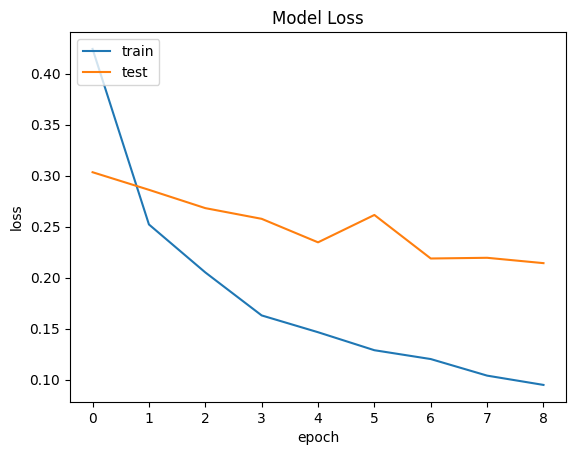

In [29]:
#Membuat plot loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

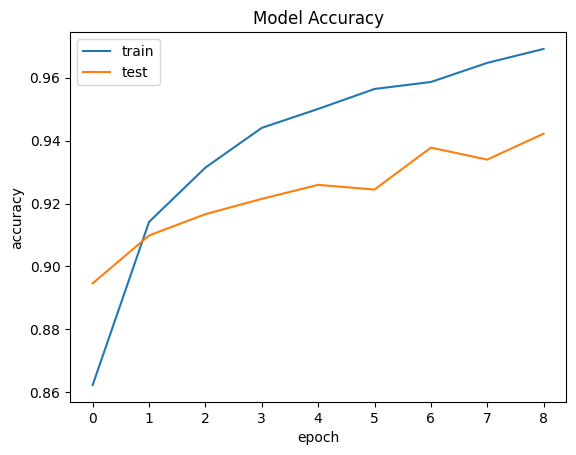

In [30]:
#Membuat Plot Accuracy
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Convert to TF-Lite

In [31]:
#Convert to tf lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)
